## 01. Data exploration

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

import sys
sys.path.append("..")  # add project root to path

from src.data_processing import *


path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: /Users/mariaminotaki/.cache/kagglehub/datasets/dylanjcastillo/7k-books-with-metadata/versions/3


In [2]:
books = pd.read_csv(f"{path}/books.csv")

#### Dataset columns

In [3]:
books.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count'],
      dtype='object')

#### Descriptive Statistics

In [4]:
books.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
isbn13,6810.0,9.780677e+12,6.068911e+08,9.780002e+12,9.780330e+12,9.780553e+12,9.780810e+12,9.789042e+12
published_year,6804.0,1.998630e+03,1.048000e+01,1.853000e+03,1.996000e+03,2.002000e+03,2.005000e+03,2.019000e+03
average_rating,6767.0,3.930000e+00,3.300000e-01,0.000000e+00,3.770000e+00,3.960000e+00,4.130000e+00,5.000000e+00
num_pages,6767.0,3.481800e+02,2.423800e+02,0.000000e+00,2.080000e+02,3.040000e+02,4.200000e+02,3.342000e+03
ratings_count,6767.0,2.106910e+04,1.376207e+05,0.000000e+00,1.590000e+02,1.018000e+03,5.992500e+03,5.629932e+06


#### Misssing observations

In [5]:
# Number of missing values per column
books.isnull().sum() 

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [6]:
# Percentage of missing values per column
(books.isnull().mean() * 100).round(2)

isbn13             0.00
isbn10             0.00
title              0.00
subtitle          65.04
authors            1.06
categories         1.45
thumbnail          4.83
description        3.85
published_year     0.09
average_rating     0.63
num_pages          0.63
ratings_count      0.63
dtype: float64

#### Heatmap of Missing Values

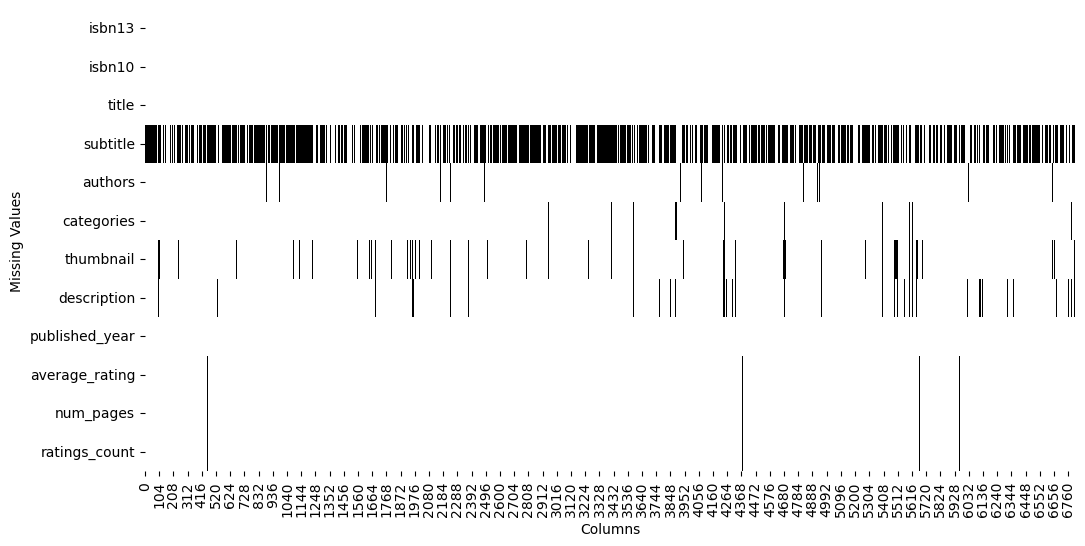

In [7]:
heatmap_missing_values(books)

- The **`subtitle`** column has the highest proportion of missing values.

- The columns **`average_rating`**, **`num_pages`**, and **`ratings_count`** show a clear pattern of missingness. This suggests they might originate from a different dataset and could introduce bias.  

- For most of the other columns, the missing values appear more random.  

<!-- 
The columns "average_rating", "num_pages", and "ratings_count" show a clear pattern in their missing values, 
likely because they originate from another dataset. This could introduce bias.  

The "subtitle" column has the highest number of missing values.  

For the other columns, missing values appear more random.  
-->


#### Unique values for each column

In [8]:
books.nunique()

isbn13            6810
isbn10            6810
title             6398
subtitle          2009
authors           3780
categories         567
thumbnail         6481
description       6474
published_year      94
average_rating     200
num_pages          915
ratings_count     3881
dtype: int64

- There are many `categories` represented in the data.  
- There are also a large number of unique book `titles`.  

In [9]:
# Create two new features:
# 1. `missing_description`: a binary flag (1 if description is missing, 0 otherwise).
# 2. `age_of_book`: calculates the book's age based on its published year (relative to 2025).

books["missing_description"] = np.where(books["description"].isna(),1,0)
books["age_of_book"] = 2025 - books["published_year"]

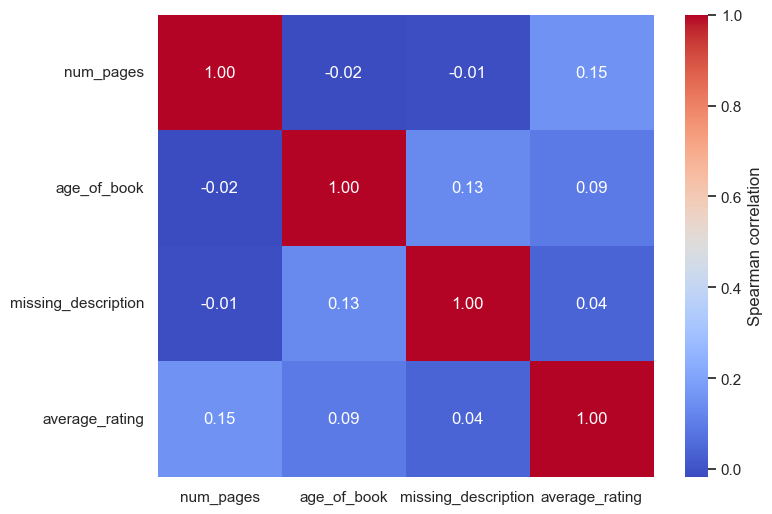

In [10]:
columns = ["num_pages", "age_of_book", "missing_description", "average_rating"]

# Using Spearman correlation because of binary data for some columns (Pearson is for continuous data)
plot_correlation_matrix(books, columns, method='spearman')

Check for correlation with the `missing_description` column.

No column shows a strong correlation with `missing_description`. For example, if `num_pages` had a correlation of 1.0 or -1.0, we would need to investigate whether shorter or longer books are more likely to have missing descriptions. 

#### Delete observations with missing values

In [11]:
books[(books['description'].isna()) |
      (books['num_pages'].isna()) |
      (books['published_year'].isna()) |
      (books['average_rating'].isna()) 
      ]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


There are around 303 observations with missing values, which is less than 5% of the dataset. Therefore, it is safe to remove them without significantly affecting the analysis.

In [12]:
book_missing = books[~(books['description'].isna()) &
      ~(books['num_pages'].isna()) &
      ~(books['published_year'].isna()) &
      ~(books['average_rating'].isna()) 
      ]

In [13]:
books.shape

(6810, 14)

In [14]:
book_missing.shape

(6507, 14)

In [15]:
book_missing.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
isbn13,6507.0,9.780668e+12,5.868404e+08,9.780002e+12,9.780317e+12,9.780552e+12,9.780807e+12,9.789042e+12
published_year,6507.0,1.998970e+03,9.840000e+00,1.876000e+03,1.997000e+03,2.002000e+03,2.005000e+03,2.019000e+03
average_rating,6507.0,3.930000e+00,3.200000e-01,0.000000e+00,3.770000e+00,3.950000e+00,4.130000e+00,5.000000e+00
num_pages,6507.0,3.460700e+02,2.334400e+02,0.000000e+00,2.080000e+02,3.040000e+02,4.180000e+02,3.342000e+03
ratings_count,6507.0,2.175727e+04,1.402505e+05,0.000000e+00,1.750000e+02,1.081000e+03,6.309500e+03,5.629932e+06
missing_description,6507.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
age_of_book,6507.0,2.603000e+01,9.840000e+00,6.000000e+00,2.000000e+01,2.300000e+01,2.800000e+01,1.490000e+02


In [16]:
book_missing.isnull().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age_of_book               0
dtype: int64

In [17]:
# Display the most frequent categories, sorted from most to least popular
book_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False) 

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [18]:
# Plot the distribution of book categories
plot_category_distribution(book_missing, category_column='categories', title='Book Category Distribution')

The `description` column contains some meaningless or uninformative comments.  
These should be removed, as they are not useful for our goal of recommending books.  
A simple approach is to remove the shortest texts. At this point, we will investigate the length of the `descriptions` and identify a threshold for the most meaningful ones.  

In [19]:
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

/var/folders/r0/j1r1w1wj62d3515ngrr0j1kc0000gn/T/ipykernel_41255/4057087481.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
book_missing.shape

(6507, 15)

In [21]:
book_missing.head(5)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45


In [22]:
plot_description_length_distribution(book_missing)

There is no clear boundary between short and long descriptions. Thus, we will investigate various word count bins to decide what constitutes a meaningful description. 

In [23]:
# Select descriptions with 1 to 4 words
book_missing.loc[book_missing['words_in_description'].between(1,4), "description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [24]:
# Select descriptions with 5 to 15 words
book_missing.loc[book_missing['words_in_description'].between(5,15), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
83      Tie your tongue in terrible knots as you try t...
                              ...                        
6730    Nineteen writers dig into the spaces between g...
6757                          Audio Book- unabriged on CD
6767    Everything from the fingerprints of the gods t...
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 395, dtype: object

In [25]:
# Select descriptions with 15 to 24 words
book_missing.loc[book_missing['words_in_description'].between(15,24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [26]:
# Select descriptions with 25 to 34 words
book_missing.loc[book_missing['words_in_description'].between(25,34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

We will remove all datapoints where the description contains fewer than 25 words, as they are likely too short to be meaningful.  

In [27]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [28]:
book_missing_25_words.shape

(5197, 15)

#### The subtitle column

In [29]:
# Combine title and subtitle into a single column, using only the title if subtitle is missing
book_missing_25_words['title_and_subtitle'] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join, axis =1))
)

/var/folders/r0/j1r1w1wj62d3515ngrr0j1kc0000gn/T/ipykernel_41255/4011297199.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
book_missing_25_words.sample()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
785,9780140437911,0140437916,Saint Joan,NaN,George Bernard Shaw,Drama,http://books.google.com/books/content?id=9S6eV...,One of Shaw's most unusual and enduringly popu...,2003.0,3.79,160.0,5789.0,0,22.0,52,Saint Joan


In [31]:
# Create a combined column of ISBN and description for tagging or text processing
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join, axis =1)

/var/folders/r0/j1r1w1wj62d3515ngrr0j1kc0000gn/T/ipykernel_41255/1324437762.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
book_missing_25_words.sample()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle,tagged_description
5250,9780814727010,0814727018,The Gramsci Reader,"Selected Writings, 1916-1935",Antonio Gramsci,Philosophy,http://books.google.com/books/content?id=nl_bJ...,"with a new introduction by ERIC J. HOBSBAWM ""V...",2000.0,4.28,447.0,499.0,0,25.0,218,"The Gramsci Reader: Selected Writings, 1916-1935",9780814727010 with a new introduction by ERIC ...


#### Save the cleaned dataset to a file

In [33]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis =1)
    .to_csv("../data/books_cleaned.csv", index=False)
)